In [1]:
%pylab inline
import numpy as np
import os

#preparing inputs
gue=open('bias_depth_cov_tier_snv.txt','r')
bgvex=open('braingvex.txt','r')
acet=open('acet.txt','r')
atac=open('humanfc.txt','r')

stad=[]
skew=[]
kurt=[]
depth=[]
cova=[]
overlap=[]
type1=[]
type2=[]
type3=[]
snv=[]


for line in gue:
    A=line.split('\t')
    A1=A[0].split(' ')
    A2=A[1].split(' ')
    A3=A2[3].split('\n')
    stad.append(float(A1[0]))
    skew.append(float(A1[1]))
    kurt.append(float(A1[2]))
    depth.append(float(A2[0]))
    cova.append(float(A2[1]))
    overlap.append(int(A3[0]))
    snv.append(int(A3[0]))
    type1.append(0)
    type2.append(0)
    type3.append(1)
    
for line in bgvex:
    A=line.split('\t')
    A1=A[0].split(' ')
    A2=A[1].split(' ')
    A3=A2[3].split('\n')
    stad.append(float(A1[0]))
    skew.append(float(A1[1]))
    kurt.append(float(A1[2]))
    depth.append(float(A2[0]))
    cova.append(float(A2[1]))
    overlap.append(int(A3[0]))
    snv.append(int(A3[0]))
    type1.append(0)
    type2.append(1)
    type3.append(0)    
    
for line in acet:
    A=line.split('\t')
    A1=A[0].split(' ')
    A2=A[1].split(' ')
    A3=A2[3].split('\n')
    stad.append(float(A1[0]))
    skew.append(float(A1[1]))
    kurt.append(float(A1[2]))
    depth.append(float(A2[0]))
    cova.append(float(A2[1]))
    overlap.append(int(A3[0]))
    snv.append(int(A3[0]))
    type1.append(0)
    type2.append(0)
    type3.append(1)
    
for line in atac:
    A=line.split('\t')
    A1=A[0].split(' ')
    A2=A[1].split(' ')
    A3=A2[3].split('\n')
    stad.append(float(A1[0]))
    skew.append(float(A1[1]))
    kurt.append(float(A1[2]))
    depth.append(float(A2[0]))
    cova.append(float(A2[1]))
    overlap.append(int(A3[0]))
    snv.append(int(A3[0]))
    type1.append(0)
    type2.append(1)
    type3.append(0)




Populating the interactive namespace from numpy and matplotlib


In [19]:
#prepare trainign and test dataset
#use the first 500 entries as toy example
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
df = pd.DataFrame()
df['stad']=stad[0:500]
df['skew']=skew[0:500]
df['kurt']=kurt[0:500]
df['depth']=depth[0:500]
df['cova']=cova[0:500]
df['t1']=type1[0:500]
df['t2']=type2[0:500]
df['t3']=type3[0:500]
y = snv[0:500] # d                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               efine the target variable (dependent variable) as y
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
#subsample
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
shape(X_train)

(12576, 8)

Number of line searches 2


0.9813206784825386

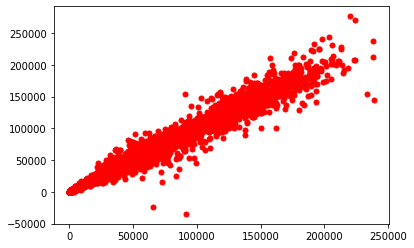

In [20]:
import pyGPs

model = pyGPs.GPR() 
model.setNoise( log_sigma = 3.61609724518 )
#m = pyGPs.mean.Linear( alpha_list=[0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003] )
k = pyGPs.Core.cov.Matern(log_ell=[8.53571426347188,7.86273364470724,15.7314831784801,3.34023839973156,19.9733814918404,-1.75129842978112,-2.35921702690416,-1.40045612390735], d=3, log_sigma=12.6732)
model.setPrior(kernel=k)
model.getPosterior(X_train, y_train)
#model.setOptimizer("Minimize", num_restarts=10)
model.optimize()
ym, ys2, fm, fs2, lp = model.predict(X_test) 
shape(ym)
# predict test cases
plt.figure()
plt.plot(y_test, ym, 'r.', markersize=10, label='Observations')
from sklearn.metrics import r2_score
r2_score(y_test, ym)